# Digits Kaggle (MNIST)

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('csv/train.csv')
test = pd.read_csv('csv/test.csv')
X_train = train[train.columns.drop('label')]
Y_train = train['label']
X_train = X_train.values
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

Plot data

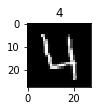

In [3]:
i = 3
plt.subplot(330 + i+1)
plt.imshow(X_train[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.title(Y_train[i])

## One hot encoding (Labels)

In [4]:
encoder = preprocessing.OneHotEncoder(sparse = False, n_values=10)
encoder.fit(Y_train.values.reshape(-1, 1))
Y_train = encoder.transform(Y_train.values.reshape(-1, 1))
Y_train = pd.DataFrame(Y_train, columns=range(10))
Y_train = Y_train.values
Y_train

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

## Deep Learning (Keras)

In [5]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D
from keras.layers.core import Flatten
from keras.optimizers import RMSprop

input = Input(shape=(28,28,1))
conv = Conv2D(filters = 1, kernel_size=(2,2))(input)
flat = Flatten()(conv)
dens = Dense(10, activation='softmax')(flat)

model = Model(inputs = input, outputs = dens)

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=32)

Using TensorFlow backend.


Epoch 1/10
42000/42000 [==============================] - 6s - loss: 6.8321 - acc: 0.5707     
Epoch 2/10
42000/42000 [==============================] - 6s - loss: 5.0275 - acc: 0.6846     
Epoch 3/10
42000/42000 [==============================] - 6s - loss: 4.7094 - acc: 0.7046     
Epoch 4/10
42000/42000 [==============================] - 6s - loss: 4.6457 - acc: 0.7090     
Epoch 5/10
42000/42000 [==============================] - 6s - loss: 4.6234 - acc: 0.7106     
Epoch 6/10
42000/42000 [==============================] - 6s - loss: 4.5991 - acc: 0.7120     
Epoch 7/10
42000/42000 [==============================] - 6s - loss: 4.5169 - acc: 0.7178     
Epoch 8/10
42000/42000 [==============================] - 6s - loss: 4.5205 - acc: 0.7171     
Epoch 9/10
42000/42000 [==============================] - 6s - loss: 4.4637 - acc: 0.7210     
Epoch 10/10
42000/42000 [==============================] - 6s - loss: 4.4216 - acc: 0.7236     


In [6]:
score = model.evaluate(X_train[0:10], Y_train[0:10])
print(score)

10/10 [==============================] - 0s
[3.2236189842224121, 0.80000001192092896]


In [7]:
prediction = model.predict(X_train[2:5])
prediction

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)